# Plotting on the Bloch Sphere

## PHYS7905/8905 J. Twamley Week 1

In [1]:
matplotlib inline

We first import qutip and other useful Python libraries.

In [2]:
import numpy as np
from qutip import *
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt

Define the Hamiltonian and the time for evolution.

In [3]:
H=sigmax()

In [4]:
t=np.pi/2.0

We now define the operator to exponentiate to get the unitary propagator, then exponentiate it.

In [5]:
HH=-1j*t*H

In [6]:
U=HH.expm()

Enter $|0\rangle$ state as the 0th element of the basis set for a two level system.

In [7]:
psi0=basis(2,0)

In [8]:
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

Now lets look at the bra $\langle 0|$

In [9]:
psi0.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 0.]]

Form the density matrix via the outerproduct: $\rho_0$

In [10]:
r0=psi0*psi0.dag()

In [11]:
r0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

Lets look at the trace of $\rho_0$

In [12]:
r0.tr()

1.0

Now lets compute the components of the Bloch vector for this density matrix
To do this we need to compute

$s_j={\rm Tr}[\sigma_j\rho_0] $

and we do this in two steps...we first compute the operator within the [] brackets and then evaluate the trace.

In [13]:
ss1=sigmax()*r0
ss2=sigmay()*r0
ss3=sigmaz()*r0

In [14]:
s1=ss1.tr().real
s2=ss2.tr().real
s3=ss3.tr().real

We now call the routine in QuTiP to create the Bloch sphere and add the specific Bloch vector we just computed.

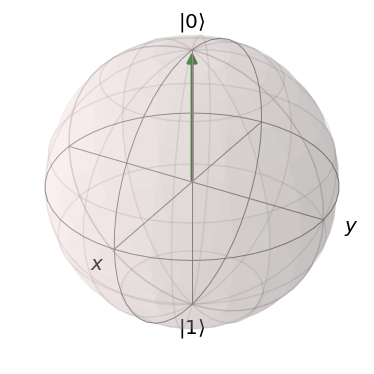

In [15]:
b=Bloch()
b.add_vectors([s1,s2,s3])
b.show()

We next redo the entire computation but now we evolve forward for a small time $\tau$.

In [16]:
tau=.1
HH=-1j*tau*H
U=HH.expm()
r1=U*r0*U.dag()
ss1=sigmax()*r1
ss2=sigmay()*r1
ss3=sigmaz()*r1
bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]

We can look at this Bloch vector...not very informative - so we can plot it on the B Sphere.

In [17]:
bloch

[0.0, -0.19866933079506127, 0.9800665778412417]

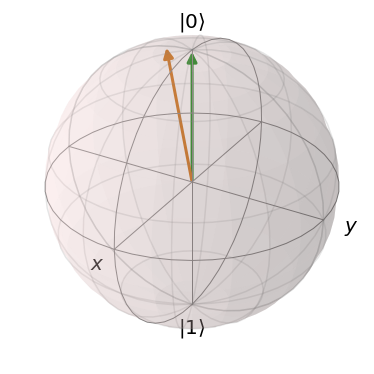

In [18]:
b=Bloch()
b.add_vectors([s1,s2,s3])
b.add_vectors(bloch)
b.show()

Now lets beef things up and loop through angles ranging from $\theta=\Delta t=0\cdots \pi$. Now you have to be careful as to get many mathematical constants and functions you have to prefix with the NumPy np. Note the indenting here is *IMPORTANT*.

In [19]:
b=Bloch()
num=10
thetas=np.linspace(0,np.pi,num)
for tau in thetas:
    HH=-1j*tau*H
    U=HH.expm()
    r1=U*r0*U.dag()
    ss1=sigmax()*r1
    ss2=sigmay()*r1
    ss3=sigmaz()*r1
    bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]
    b.add_vectors(bloch)

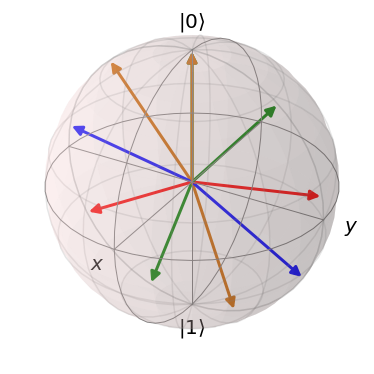

In [20]:
b.show()

Now we repeat but now with many angles and save each image into a file with PNG format. We then can go into matlab and assemble all these images into a movie.

In [24]:
b=Bloch()
num=100
thetas=np.linspace(0,np.pi,num)
for i in range(num):
    tau=thetas[i]
    HH=-1j*tau*H
    U=HH.expm()
    r1=U*r0*U.dag()
    ss1=sigmax()*r1
    ss2=sigmay()*r1
    ss3=sigmaz()*r1
    bloch=[ss1.tr().real,ss2.tr().real,ss3.tr().real]
    b.add_vectors(bloch)
    b.render()
    # save to screenshot
    # b.fig.savefig("bloch_sf%d.png" % i)